# Easy2D-Python Report
### Christopher Barrow and Simon Schmitt


## Introduction
The Easy2D-Python project is a translation of the Easy2D_MATLAB codebase to the Python language. This effort will hopefully let programmers that are more familiar with the Python language to easy work with and modify the Easy2D code. 

### Installation of Required Packages
This python version utilizes the NumPy for building the matricies used in the code, and should be the only external library needed to run the code. The Numpy library can be installed using `pip` with the command:
```
pip install numpy
```
If you are using Anaconda, Numpy should already be installed but can be similarly installed with the command:
```
conda install numpy
```
For performing the post-processing and visualization of the solution, the library MatPlotLib should also be installed, using:
```
pip install matplotlib
```
or
```
conda install matplotlib
```

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Easy2D import easy2D

## Test Cases
In order to verify that the code works as intended, a set of test cases were run to verify the validity of the solutions from the code. These test cases are:
1. Interior Problem
    - This case will test how the solution handles an interior problem, specifying a desired solution and applying appropriate boundary conditions to meet this solution
    - This will include a case to study a constant field, i.e. $\phi=1$
    - Another case shall be run where the desired solution is $\phi=x+y$.
2. Exterior Problem
    - This is similar to the interior problem, with the exception that the solution will be evaluated on the exterior of the boundary
3. Scattering
   - Point Source
     - This is an exterior problem where a point source is in the exterior domain
   - 

## Interior Problem

### Constant Field
The first test case to run is verifying the code can reproduce a constant field, i.e. $\phi=1$ everywhere. A simple geometry shall be used, consisting of a unit square, meshed into 16 linear elements. The boundary conditions for all nodes shall be set so that $\phi=1$ for all elements. The input file used to test this condition is given below.
```
TestCase 1: Interior problem, quadratic domain, Dirichlet BC, constant phi=1
NODES
16,4 
1,5,0,0,1,0
5,9,1,0,1,1
9,13,1,1,0,1
13,16,0,1,0,0.25
ELEMENTS
16,1
1,1,16,1
BOUNDARY CONDITIONS
1
1,16,0,1,0,1
FIELD
9
0.25,0.25
0.25,0.5
0.25,0.75
0.5,0.25
0.5,0.5
0.5,0.75
0.75,0.25
0.75,0.5
0.75,0.75
SOLVE
```

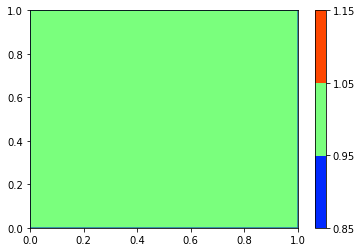

In [3]:
easy2D('TestCase1.dat')

### Prescribed Field
The next test will determine if the code can reproduce the correct prescribed field. The field that is desired is $\phi=x+y$. Again, a unit square meshed by 16 elements shall be used. The boundary conditions are as follows:
- Left: $\frac{d\phi}{dn}=-1$
- Right: $\frac{d\phi}{dn}=1$
- Top: $\frac{d\phi}{dn}=1$
- Bottom: $\frac{d\phi}{dn}=-1$
- At origin node: $\phi=0$

The resulting input file is below:
```
TestCase 2: Interior problem, quadratic domain, Neumann BC + single Dirichlet for well-posedness, phi=x+y
NODES
16,4
1,5,0,0,1,0
5,9,1,0,1,1
9,13,1,1,0,1
13,16,0,1,0,0.25
ELEMENTS
16,1
1,1,16,1
BOUNDARY CONDITIONS
5
1,1,1,1,0,0
1,1,2,0,1,-1
2,4,0,0,1,-1
5,12,0,0,1,1
13,16,0,0,1,-1
FIELD
9
0.25,0.25
0.25,0.5
0.25,0.75
0.5,0.25
0.5,0.5
0.5,0.75
0.75,0.25
0.75,0.5
0.75,0.75
SOLVE
```

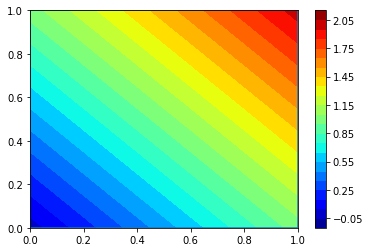

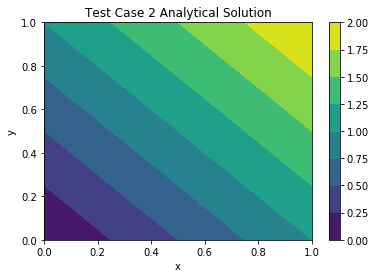

In [17]:
# Easy2D Solution
easy2D('TestCase2.dat')

# Real Solution
xlist = np.linspace(0, 1, 100)
ylist = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xlist, ylist)
phi = X + Y
plt.figure()
cp = plt.contourf(X, Y, phi)
plt.colorbar(cp)
plt.title('Test Case 2 Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Triangle Geometry
The final internal case will still be solving for the $\phi=x+y$ field, however a triangle geometry shall be used instead. The triangle will go from $(0,0)\rightarrow(1,0)\rightarrow(0.5,1)\rightarrow(0,0)$ with 4 elements on each side. The derivation of the boundary conditions for the left and right side is given below.
$$\phi=x+y$$
$$\nabla\phi=\langle 1,1 \rangle$$
$$\frac{\partial\phi}{\partial n} = \nabla\phi\cdot \vec{n}$$
For the right side:
$$ m = \frac{1-0}{0.5-1}=-2$$
$$ y - 0.5 = -2(x-1) $$
$$ y + 2x - 2.5 = 0 $$
$$ \vec{n} = \langle 2, 1 \rangle $$
$$\left(\frac{\partial \phi}{\partial n}\right)_\text{right} = \langle 1,1 \rangle \cdot \frac{\langle 2,1 \rangle}{\sqrt{2^2 + 1^2}} = \frac{3}{\sqrt{5}}$$

For the left side:
$$ m = \frac{1-0}{0.5-0}=2$$
$$ y - 0 = 2(x-0) $$
$$ y - 2x = 0 $$
$$ \vec{n} = \langle -2, 1 \rangle $$
$$\left(\frac{\partial \phi}{\partial n}\right)_\text{left} = \langle 1,1 \rangle \cdot \frac{\langle -2,1 \rangle}{\sqrt{(-2)^2 + 1^2}} = \frac{1}{\sqrt{5}}$$
The bottom side boundary condition will simply be $\frac{\partial \phi}{\partial n}=-1$ and we will again specify the origin node to be $\phi=0$. The input file used to perform this is given below.
```
TestCase 3: Interior problem, quadratic domain, Neumann BC + single Dirichlet for well-posedness, phi=x+y
NODES
12,3
1,5,0,0,1,0
5,9,1,0,0.5,1
9,12,0.5,1,0.125,0.25
ELEMENTS
12,1
1,1,12,1
BOUNDARY CONDITIONS
5
1,1,1,1,0,0
1,1,2,0,1,-1
2,4,0,0,1,-1
5,8,0,0,1,1.3416407865
9,12,0,0,1,-0.4472135955
FIELD
16
0.2,0.1
0.3,0.1
0.4,0.1
0.5,0.1
0.6,0.1
0.7,0.1
0.8,0.1
0.3,0.25
0.4,0.25
0.5,0.25
0.6,0.25
0.7,0.25
0.4,0.5
0.5,0.5
0.6,0.5
0.5,0.75
SOLVE
```

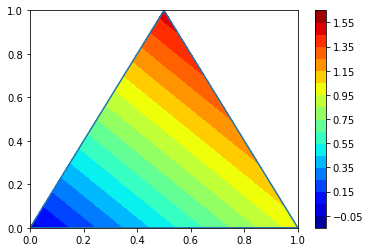

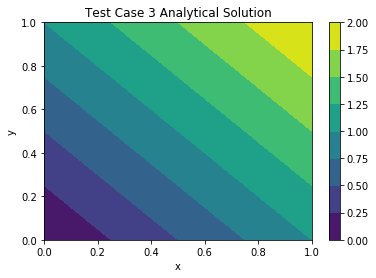

In [33]:
easy2D('TestCase3.dat')

# Real Solution
xlist = np.linspace(0, 1, 100)
ylist = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xlist, ylist)
phi = X + Y
plt.figure()
cp = plt.contourf(X, Y, phi)
plt.colorbar(cp)
plt.title('Test Case 3 Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()